In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")
%matplotlib inline

# Reading the dataset

In [6]:
df = pd.read_csv(r"C:\Users\hp\Downloads\Algerian_forest_fires_dataset_UPDATE.csv", header=1)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


# Basic Information about dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [9]:
df.loc[122:].head()
df.drop(index=[122,123],inplace=True)
df.reset_index(inplace=True)

In [10]:
df

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
240,242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


# Dividing the dataset to region wise and creating a column named as region

In [22]:
df['Region']=0
for i in range(len(df)):
    if i<122:
        df['Region'][i]=0
    else:
        df['Region'][i]=1
df        

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,Region
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,0
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0,0
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,0
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0,0
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,0,1
240,242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,0,1
241,243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,0,1
242,244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,0,1


In [21]:
df.drop(['region','Region'],axis=1)

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
240,242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


Cross checking the dataset

In [23]:
l1=[]
l2=[]
for i in df['Region']:
    if i==0:
        l1.append(i)
    else:
        l2.append(i)
print(len(l1))
print(len(l2))

122
122


In [24]:
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region',
       'Region'],
      dtype='object')

In [25]:
df

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,Region
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,0
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0,0
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,0
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0,0
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,0,1
240,242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,0,1
241,243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,0,1
242,244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,0,1


In [29]:
df1=df.drop('region',axis=1)

In [30]:
df1

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
240,242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
241,243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [31]:
df1.columns

Index(['index', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

# Removing Extra spaces from column

In [34]:
for col in df1.columns:
    df1.rename(columns={col:col.strip()},inplace=True)
print(df1.columns)

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')


# Record at mis match position 

In [37]:
df1.iloc[165]

index              167
day                 14
month               07
year              2012
Temperature         37
RH                  37
Ws                  18
Rain               0.2
FFMC              88.9
DMC               12.9
DC              14.6 9
ISI               12.5
BUI               10.4
FWI            fire   
Classes            NaN
Region               1
Name: 165, dtype: object

In [38]:
df1.at[165,'DC']=14.6
df1.at[165,'ISI']=9
df1.at[165,'BUI']=12.5
df1.at[165,'FWI']=10.4
df1.at[165,'Classes']='fire'

In [39]:
df1.iloc[165]

index           167
day              14
month            07
year           2012
Temperature      37
RH               37
Ws               18
Rain            0.2
FFMC           88.9
DMC            12.9
DC             14.6
ISI               9
BUI            12.5
FWI            10.4
Classes        fire
Region            1
Name: 165, dtype: object

# checking the datatyp of columns and changing it correctly

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        244 non-null    int64 
 1   day          244 non-null    object
 2   month        244 non-null    object
 3   year         244 non-null    object
 4   Temperature  244 non-null    object
 5   RH           244 non-null    object
 6   Ws           244 non-null    object
 7   Rain         244 non-null    object
 8   FFMC         244 non-null    object
 9   DMC          244 non-null    object
 10  DC           244 non-null    object
 11  ISI          244 non-null    object
 12  BUI          244 non-null    object
 13  FWI          244 non-null    object
 14  Classes      244 non-null    object
 15  Region       244 non-null    int64 
dtypes: int64(2), object(14)
memory usage: 30.6+ KB


In [42]:
df1[['day','month','year','Temperature','RH','Ws']]=df1[['day','month','year','Temperature','RH','Ws']].astype(int)

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        244 non-null    int64 
 1   day          244 non-null    int32 
 2   month        244 non-null    int32 
 3   year         244 non-null    int32 
 4   Temperature  244 non-null    int32 
 5   RH           244 non-null    int32 
 6   Ws           244 non-null    int32 
 7   Rain         244 non-null    object
 8   FFMC         244 non-null    object
 9   DMC          244 non-null    object
 10  DC           244 non-null    object
 11  ISI          244 non-null    object
 12  BUI          244 non-null    object
 13  FWI          244 non-null    object
 14  Classes      244 non-null    object
 15  Region       244 non-null    int64 
dtypes: int32(6), int64(2), object(8)
memory usage: 24.9+ KB


In [44]:
df1[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']]=df1[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)

In [45]:
df1.dtypes

index            int64
day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
dtype: object

# check how many unique categories we have in classes column

In [56]:
df1['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

AttributeError: 'float' object has no attribute 'strip'

In [58]:
df1['Classes']=df1['Classes'].astype(str)

In [61]:
## removing extra spaces
df1['Classes']=[i.strip() for i in df1['Classes']]

In [62]:
df1['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

# Shape of data

In [66]:
df1.drop(['index'],axis=1,inplace=True)
df1.shape

(244, 15)

# Summary of Data

In [67]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
year,244.0,2012.000000,0.000000,2012.0,2012.000,2012.00,2012.000,2012.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288115,47.619662,6.9,13.275,33.10,68.150,220.4


# missing Value check

In [70]:
df1.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [71]:
##Overall missing value check
df1.isnull().sum().sum()

0

# Checking No of numeric and categorical column

In [75]:
num_fea=[fea for fea in df1.columns if df1[fea].dtypes!='object']

In [76]:
num_fea

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Region']

In [78]:
cat_fea=[fea for fea in df1.columns if df1[fea].dtypes=='object']

In [79]:
cat_fea

['Classes']

In [84]:
##discrete feature

dic_fea=[fea for fea in num_fea if len(df[fea].unique())<35]

In [85]:
dic_fea

['day', 'month', 'year', 'Temperature', 'Ws', 'Region']

In [87]:
##continuos feature
cont_fea=[fea for fea in num_fea if fea not in dic_fea]
cont_fea

['RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

# Univariate Analysis for categorical feature

In [88]:
cat_fea

['Classes']

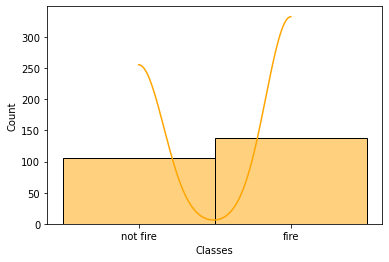

In [93]:
for fea in cat_fea:
    sns.histplot(data=df1,x=fea,kde=True,bins=15,color='orange')
    plt.show()

# Univariate Analysis for numerical feature

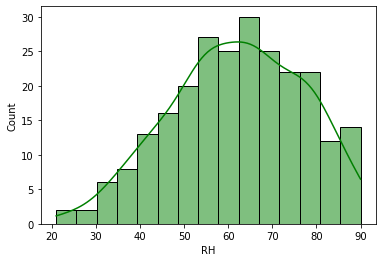

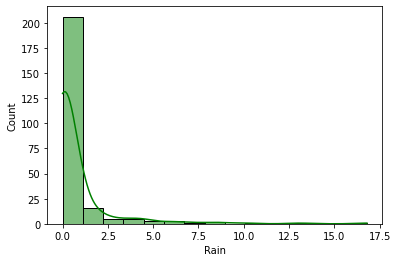

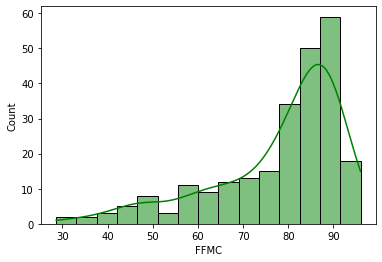

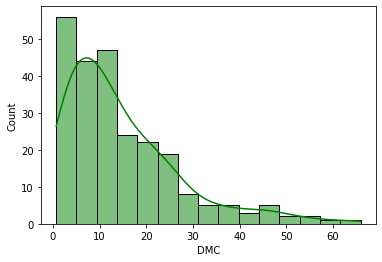

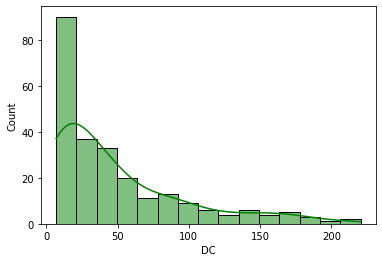

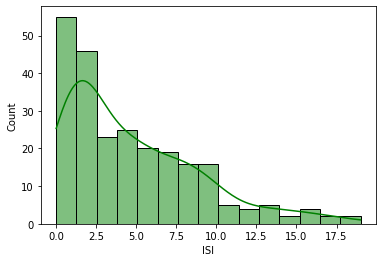

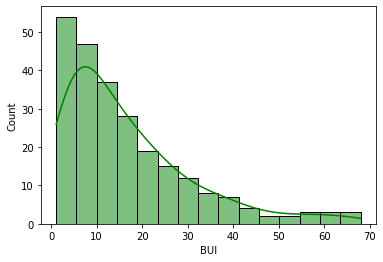

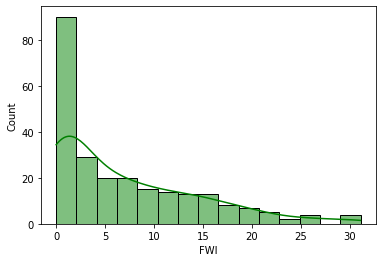

In [98]:
for fea in cont_fea:
    sns.histplot(data=df1,x=fea,kde=True,bins=15,color='green')
    plt.show()

# Observation on Univariate analysis

1. RH is following almost guassian distribution.
2. Rain,DMC,DC,ISI,BUI,FWI are following right skewed distribution
3. FFMC following left skewed distribution

# Bivariate analysis between discrete numerical feature and target feature

In [99]:
cat_fea

['Classes']

In [103]:
for i in cat_fea:
    print(df1.groupby(i)['Region'].value_counts())

Classes   Region
fire      1         79
          0         59
not fire  0         63
          1         43
Name: Region, dtype: int64


<AxesSubplot:xlabel='Classes', ylabel='count'>

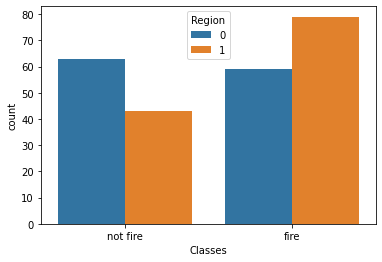

In [104]:
sns.countplot(data=df1,x='Classes',hue='Region')

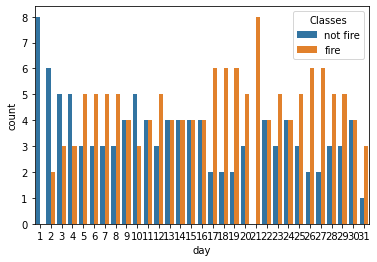

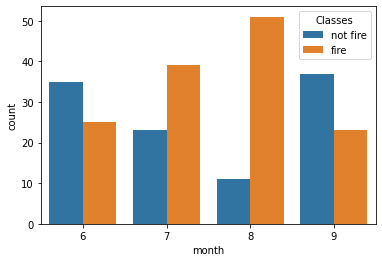

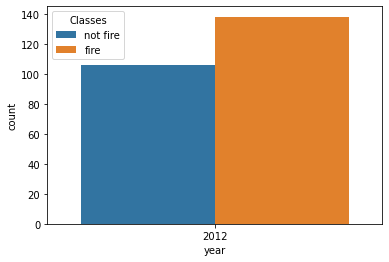

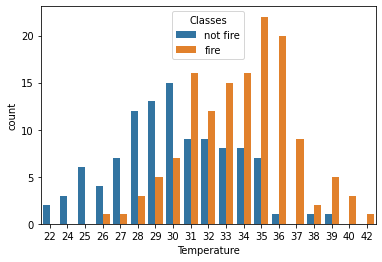

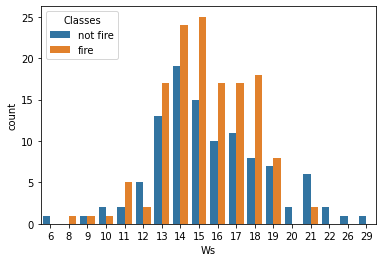

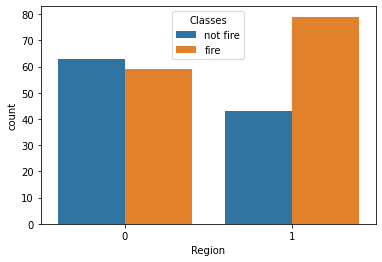

In [107]:
for fea in dic_fea:
    sns.countplot(data=df1,x=fea,hue='Classes')
    plt.show()

# Observation 

1. classes vs day : Almost everyday the occurence of fire is visible and the count of fire is greater or equal to not fire count
2. classes vs months : occurence of fire is high in month of july and august as compared to june and september.
3. classes vs Year : Occurence of fire is high in 2012.
4. classes vs tempreture : if the tempreture is in between 36 to 42, then there is high chances of fire.
5. classes vs wind speed(ws) : if the ws is between 13 to 19, then there is high chances of fire.
6. classes vs region : sidi bel abbes region has more fire chances.

In [108]:
cont_fea

['RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

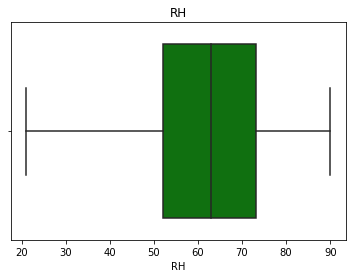

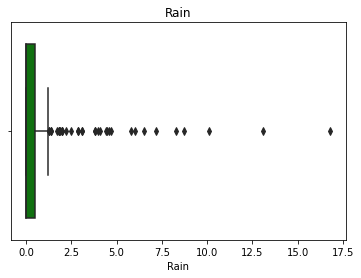

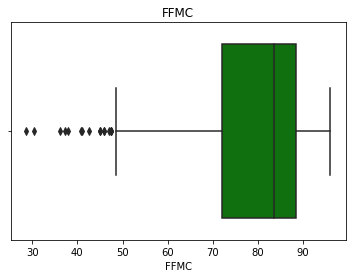

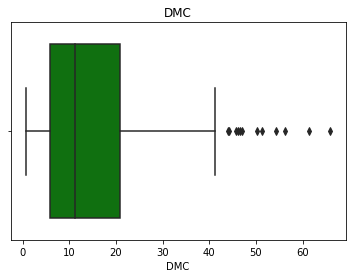

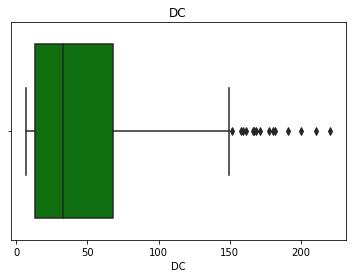

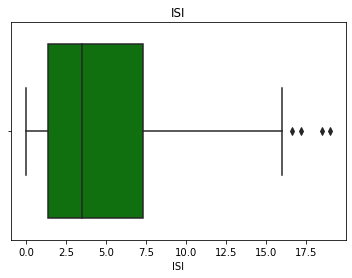

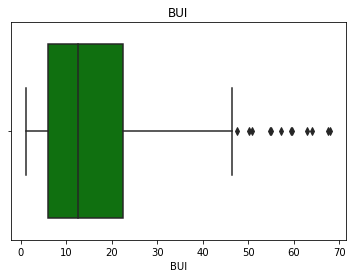

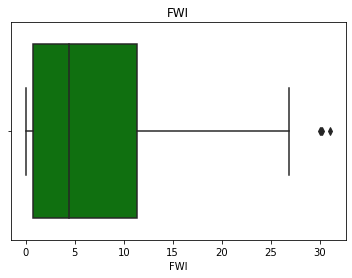

In [111]:
for fea in cont_fea:
    sns.boxplot(data=df1,x=fea,color='g')
    plt.title(fea)
    plt.show()

# Observation of outlier in continious feature

feature having outlier : Rain,FFMC,DMC,DC,ISI,BUI,FWI

# Correlation between Each numerical feature

In [114]:
data= round(df1[[feature for feature in num_fea if feature not in ['day', 'month','year', 'Region']]].corr(),2)
data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.00,-0.65,-0.28,-0.33,0.68,0.48,0.37,0.61,0.46,0.57
RH,-0.65,1.00,0.24,0.22,-0.65,-0.41,-0.22,-0.69,-0.35,-0.58
Ws,-0.28,0.24,1.00,0.17,-0.16,-0.00,0.08,0.01,0.03,0.03
Rain,-0.33,0.22,0.17,1.00,-0.54,-0.29,-0.30,-0.35,-0.30,-0.32
FFMC,0.68,-0.65,-0.16,-0.54,1.00,0.60,0.50,0.74,0.59,0.69
DMC,0.48,-0.41,-0.00,-0.29,0.60,1.00,0.88,0.68,0.98,0.88
DC,0.37,-0.22,0.08,-0.30,0.50,0.88,1.00,0.50,0.94,0.74
ISI,0.61,-0.69,0.01,-0.35,0.74,0.68,0.50,1.00,0.64,0.92
BUI,0.46,-0.35,0.03,-0.30,0.59,0.98,0.94,0.64,1.00,0.86
FWI,0.57,-0.58,0.03,-0.32,0.69,0.88,0.74,0.92,0.86,1.00


<AxesSubplot:>

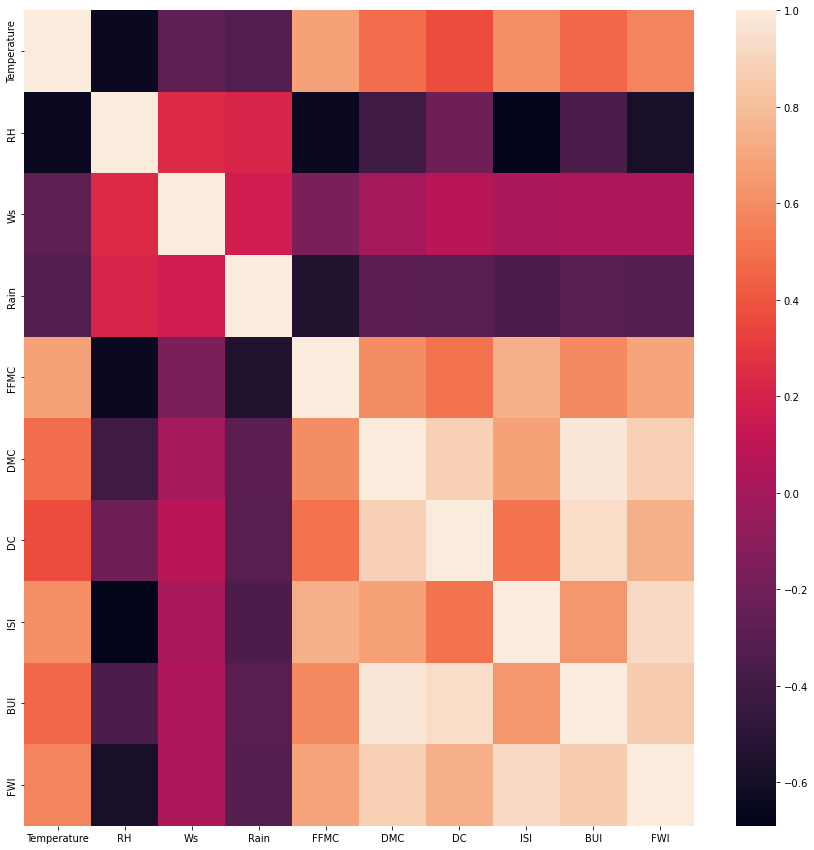

In [115]:
plt.figure(figsize=(15,15))
sns.heatmap(data)

Note -

1. Correlation coefficients between 0.9 and 1.0, very highly correlated.
2. Correlation coefficients between 0.7 and 0.9, highly correlated.
3. Correlation coefficients between 0.5 and 0.7, moderately correlated.
4. Correlation coefficients between 0.3 and 0.5, low correlation.
5. Correlation coefficients less than 0.3, little correlation

# Observation

1. Very highly Correlated features: DMC-BUI, DC-BUI, ISI-FWI
2. Highly correlated features: FFMC-ISI, DC-DMC, FWI-DMC, FWI-DC, FWI-BUI
Note: Features with very hihg and high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, we can drop one of the two features.

# Realtionship between numerical feature and target feature

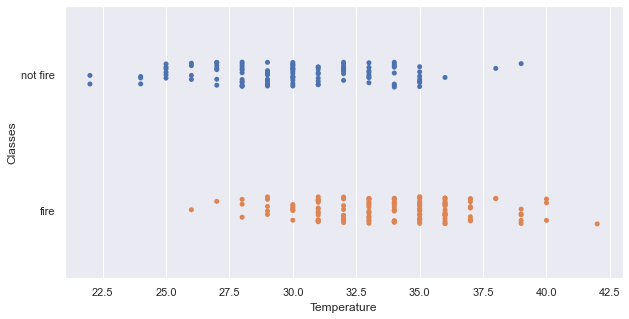

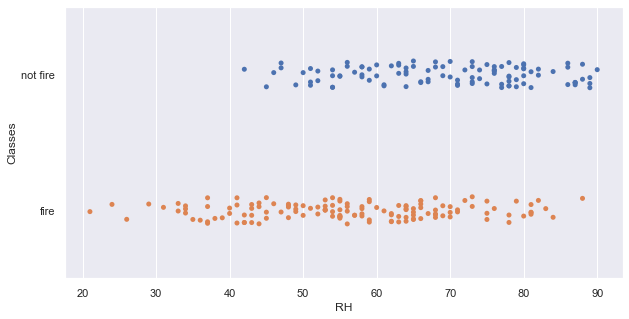

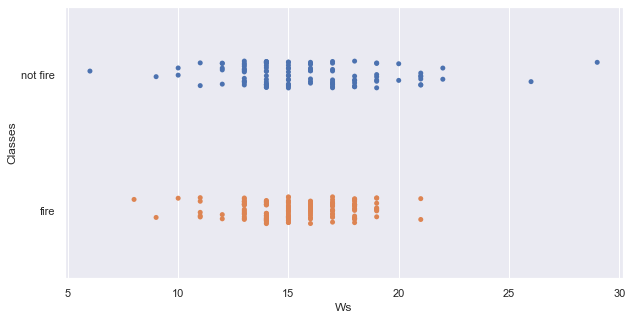

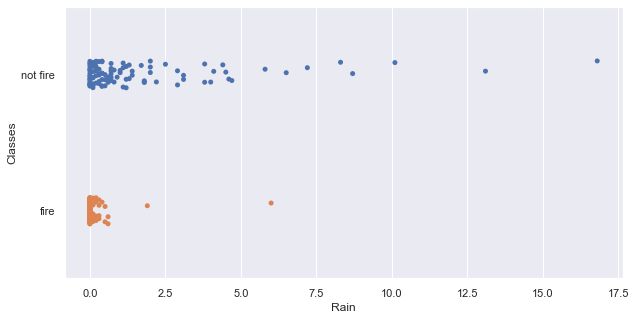

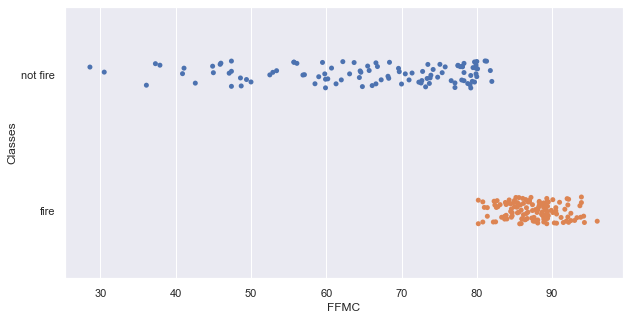

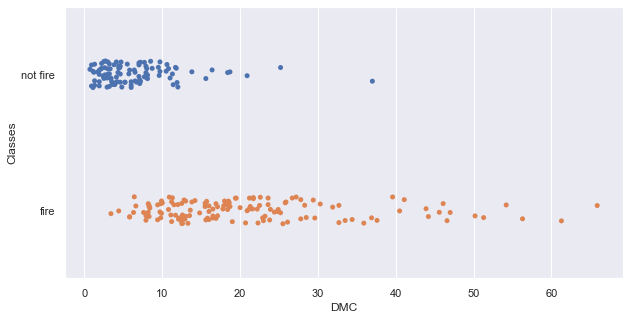

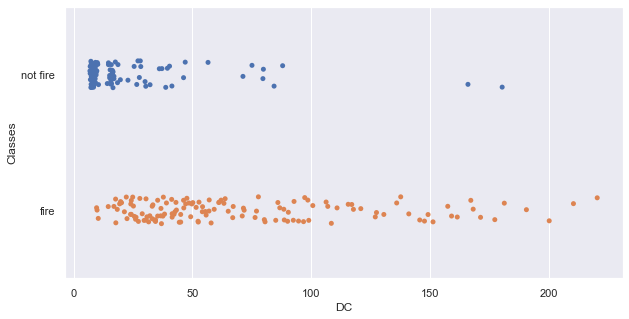

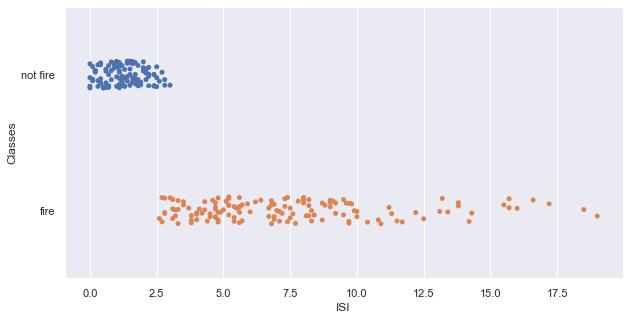

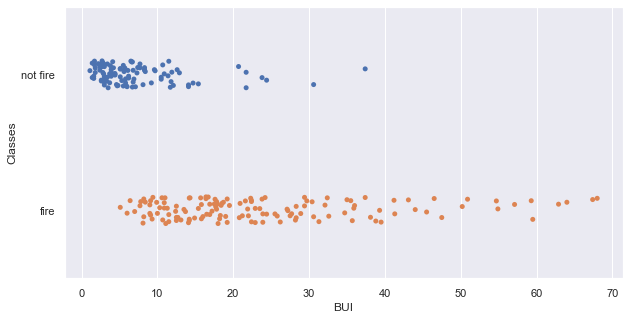

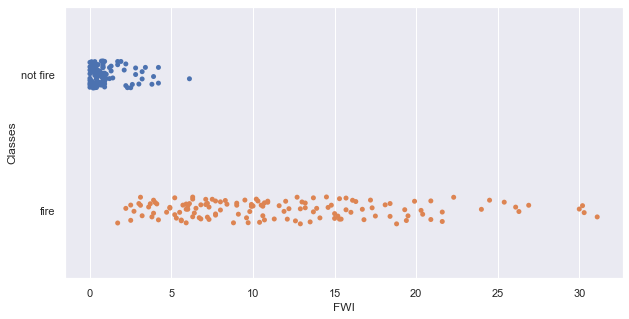

In [116]:
num_fea_cust=[feature for feature in num_fea if feature not in ['day', 'month', 'year', 'Region']]

sns.set(rc={'figure.figsize':(10,5)})
for feature in num_fea_cust:
    sns.stripplot(data=df1, x=feature, y='Classes')
    plt.show();

# Observation :

1. It is visible that for temperature between 30 to 37, there is most no of cases of occurance of fire, i.e Hot regions are more prone to forrest fires.
2. For RH 40 to 70 and wind speed between 13 to 19 Km/h, Most no of cases of occurance of fire is reported, i.e dry regions are more prone to forrest fires.
3. Almost all cases of occurance of fire is for region having rain less than 1 mm, i.e dry regions are more prone to forrest fires.
4. For FFMC(Fine Fuel Moisture Code ) greater than 80, almost all cases of fire is reported.
5. DMC (Duff Moisture Code) >30 and DC (Drought code) >100, almost all cases of occurance of fire reported, this means drought affected areas are more prone to forrest fires.

# Final Observation : 

1. Very highly Correlated features: DMC-BUI, DC-BUI, ISI-FWI
2. Highly correlated features: FFMC-ISI, DC-DMC, FWI-DMC, FWI-DC, FWI-BUI
3. Temperature between 30 to 37 degree celcius have most no of cases of occurance of fire.
4. Wind speed between 13 to 19 Km/hr range there is most no of occurance of fire.
5. Almost all cases of occurance of fire is for region having rain less than 1 mm, i.e dry regions are more prone to forrest fires.
6. For FFMC(Fine Fuel Moisture Code ) greater than 80, almost all cases of fire is reported.
7. DMC (Duff Moisture Code) >30 and DC (Drought code) >100, almost all cases of occurance of fire reported, this means drought affected areas are more prone to forrest fires.
7. In Bejaia region, the no of cases of occurance of fire is less compared to no of cases of occurance of no fire.
8. In Sidi Bel-abbes region the no of cases of occurance of fire is more compared to no fire.
9. Also Overall no of cases of occurance of fire is more in Sidi Bel-abbes region as compared to Bejaia region.
10. Most no of cases of fire occured are in the month of august and least no of cases of fire occured is in month of september.
11. July and august have more cases of fire as compared to no fire.
12. June and september have more cases of no fire as compared to fire.
13. Relative Humidity, RH feature doesnt have outliers whereas Temperature, FFMC, wind speed, Rain, DMC,DC, ISI, BUI and FWI have outilers.
14. There is no null vales in dataset.
